✅ Accuracy: 0.976695796920516

📋 Classification Report:
               precision    recall  f1-score   support

     Churned       0.97      0.95      0.96       705
      Stayed       0.98      0.99      0.98      1698

    accuracy                           0.98      2403
   macro avg       0.98      0.97      0.97      2403
weighted avg       0.98      0.98      0.98      2403



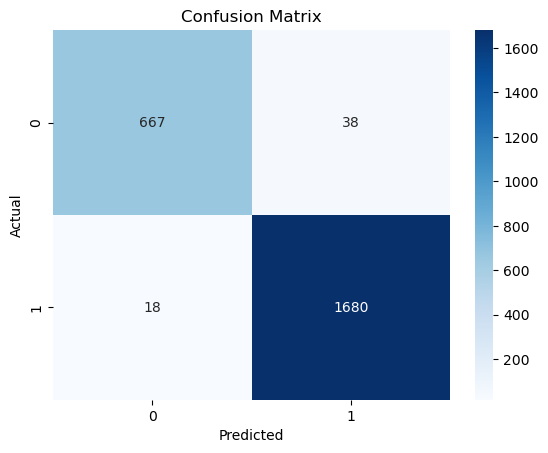

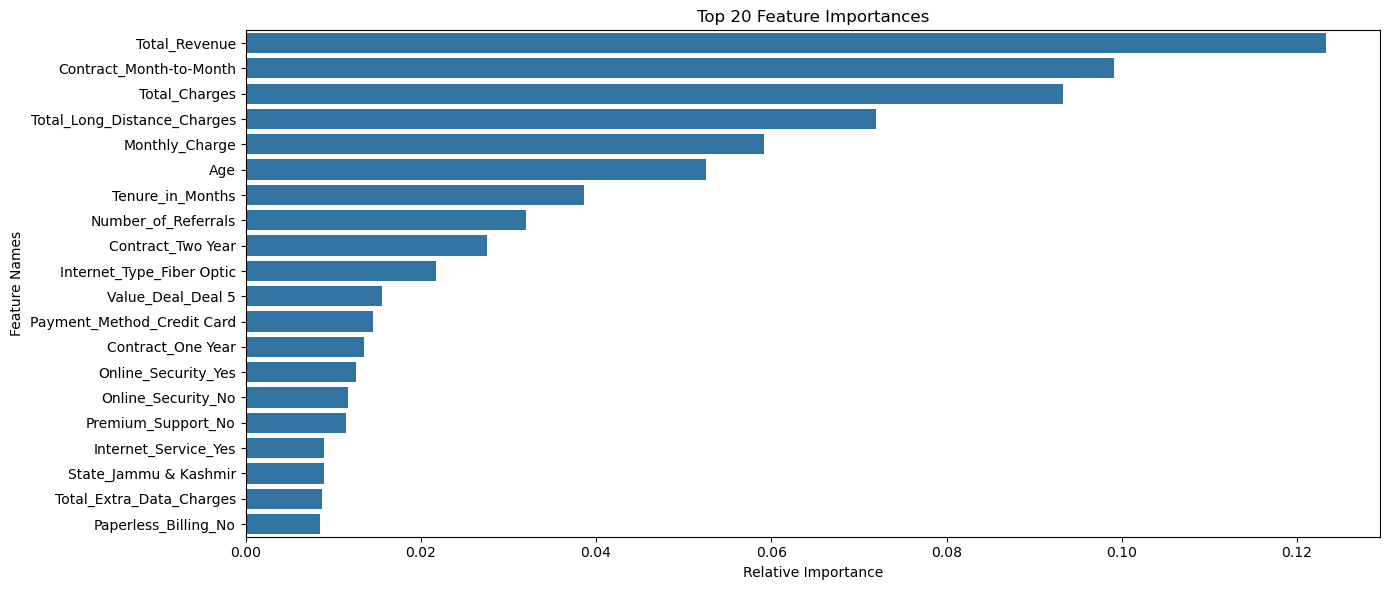

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Excel sheet
file_path = "E:\\Book1.xlsx"
sheet_name = "vw_ChurnData"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. Drop unnecessary ID and detail columns
df.drop(columns=["Customer_ID", "Churn_Category", "Churn_Reason"], inplace=True)

# 3. Set target and features
target_column = "Customer_Status"
y = df[target_column]
X = df.drop(columns=[target_column])

# 4. Handle missing values
X = X.fillna("None")

# 5. One-hot encode feature columns
X_encoded = pd.get_dummies(X)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 7. Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 8. Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix (Optional)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. Feature Importance Plot (top 20)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(14, 6))
sns.barplot(x=importances[indices][:20], y=X_encoded.columns[indices][:20])
plt.title('Top 20 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

# Load Joiner data
file_path = "E:\\Book1.xlsx"
sheet_name = "vw_JoinData"
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Backup original data
original_data = new_data.copy()
customer_ids = new_data['Customer_ID']

# Drop columns not needed for prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Handle missing values
new_data = new_data.fillna("None")

# One-hot encode new data (same as training)
new_data_encoded = pd.get_dummies(new_data)

# Align columns with training data
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Make predictions
new_predictions = model.predict(new_data_encoded)

# Add predictions to original dataframe
original_data['Customer_Status_Predicted'] = new_predictions

# Filter only predicted as "Churned"
# You may need to match string value instead if labels are strings
original_data = original_data[original_data['Customer_Status_Predicted'] == "Churned"]

# Save to Excel
original_data.to_excel("C:\\Users\\yeshi\\Desktop\\re make churn dataset.xlsx", index=False)

print("✅ Prediction and export complete.")


✅ Prediction and export complete.
